<a href="https://colab.research.google.com/github/AurelienCD/Formation_OCR_Ing_Machine_Learning/blob/main/AAA_OCR_Projet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connexion au google drive, déplacement dans le dossier contenant les données nécessaires au projet

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 2

/content/drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 2


Importation des librairies nécessaires au projet

In [4]:
import pandas as pad 

#import datetime
#import codecs
#import statistics
#from path import Path
#import shutil

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr


In [7]:
df = pad.read_csv('data_projet2.csv', sep='\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Exploration rapide des données

In [ ]:
df.shape

In [11]:
df.head()

code  ... empreinte_carbonne_théorique
0   3087  ...                         0.31
1   4530  ...                         0.48
2   4559  ...                         0.48
3  16087  ...                         0.48
4  16094  ...                         0.48

[5 rows x 165 columns]

In [ ]:
df.describe()


Evaluation des variables utilisables ou non pour la problématique

In [ ]:
print("Shape de la variable empreinte carbone : " + str(df['carbon-footprint_100g'].shape))
df['carbon-footprint_100g'].describe()
print("Nombre de NaN de la variable empreinte carbone : " + str(df['carbon-footprint_100g'].isna().sum()))
print("Nombre de NaN de la variable pays d'origine : " + str(df['countries_fr'].isna().sum()))

Shape de la variable empreinte carbone : (320772,)
Nombre de NaN de la variable empreinte carbone : 320504
Nombre de NaN de la variable pays d'origine : 280


Ajouter une nouvelle colonne nous informant si le produit est fabriqué en UE ou non

In [8]:
liste_pays_europe = ["Allemagne", "Royaume-Uni", "France", "Slovénie", "Pays-Bas", "Belgique", "Espagne", "Suisse", "Irlande", "Portugal", "Roumanie", "Italie", "Moldavie", "Scotland", "Serbie", "Pologne", "Grèce", "République tchèque", "Hongrie", "Bulgarie", "Danemark", "Suède", "Norvège", "Slovaquie", "Ukraine", "Island", "Autriche", "Luxembourg"]
in_UE_list = []

for elm in df['countries_fr']:
  for i in range(len(liste_pays_europe)):
    if liste_pays_europe[i] in str(elm):
      in_UE = "oui"
      break
    else:
      in_UE = "non"  
  if in_UE == "oui":
    in_UE_list.append("oui")
  elif in_UE == "non":
    in_UE_list.append("non")
print(in_UE_list)
print(in_UE_list.count('oui'))

df['Produce_in_UE'] = in_UE_list

['oui', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'oui', 'oui', 'oui', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'oui', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'oui', 'non', 'oui', 'non', 'non', 'non', 'non'

Ajouter une nouvelle colonne nous informant si le produit est fabriqué en France ou non

In [9]:
in_France_list = []

for i in range(len(df['countries_fr'])):
  if "France" in str(df['countries_fr'][i]):
    in_France_list.append("oui")
  else:
    in_France_list.append("non")

print(in_France_list)
print(in_France_list.count('oui'))

df['Produce_in_France'] = in_France_list

['oui', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'oui', 'non', 'oui', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'oui', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'oui', 'non', 'oui', 'non', 'non', 'non', 'non'

Ajouter une nouvelle colonne nous informant sur l'empreinte carbonne théorique (suivant documentations/sources fiables) d'une alimentation annuelle consommant ce type de produit en se basant sur la nouvelle colonne df['Produce_in_UE']

In [10]:
empreinte_carbonne_théorique_list = []

for i in range(len(df['Produce_in_UE'])):
  if "oui" in str(df['Produce_in_UE'][i]):
    empreinte_carbonne_théorique_list.append(0.31)
  else:
    empreinte_carbonne_théorique_list.append(0.48)



df['empreinte_carbonne_théorique'] = empreinte_carbonne_théorique_list






DEBUT DES TESTS

In [21]:
df['glycemic-index_100g'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: glycemic-index_100g, dtype: float64

In [20]:
np.isnan(df['glycemic-index_100g'][0])

True

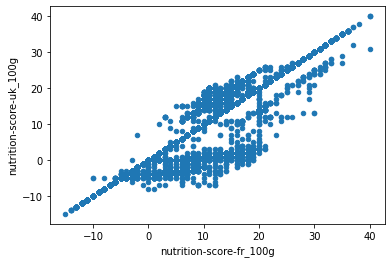

In [22]:
#df.boxplot(column='nutrition-score-fr_100g',by='Produce_in_UE')

df.plot.scatter(x='nutrition-score-fr_100g',y='nutrition-score-uk_100g')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd565689710>]],
      dtype=object)

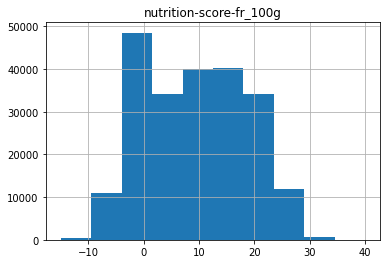

In [14]:
df.hist(column='nutrition-score-fr_100g')

In [13]:
print(df["nutrition-score-fr_100g"].describe())

count    221210.000000
mean          9.165535
std           9.055903
min         -15.000000
25%           1.000000
50%          10.000000
75%          16.000000
max          40.000000
Name: nutrition-score-fr_100g, dtype: float64


In [ ]:
print(df["carbon-footprint_100g"].mean())
print(df["carbon-footprint_100g"].min())
print(df["carbon-footprint_100g"].max())

341.70076380970147
0.0
2842.0


In [ ]:
df.head()

code  ... Produce in France
0   3087  ...               oui
1   4530  ...               non
2   4559  ...               non
3  16087  ...               non
4  16094  ...               non

[5 rows x 164 columns]

In [ ]:
df[df['Produce in UE'] == "oui"]["carbon-footprint_100g"]

0        NaN
46       NaN
47       NaN
48       NaN
106      NaN
          ..
320764   NaN
320765   NaN
320766   NaN
320767   NaN
320770   NaN
Name: carbon-footprint_100g, Length: 139337, dtype: float64

In [ ]:
print(df[df['Produce in France'] == "oui"]["carbon-footprint_100g"].mean())
print(df[df['Produce in France'] == "non"]["carbon-footprint_100g"].mean())

366.26536761931817
294.70760869565214


In [ ]:
print(df[df['Produce in UE'] == "oui"]["carbon-footprint_100g"].mean())
print(df[df['Produce in UE'] == "non"]["carbon-footprint_100g"].mean())

347.4000179427481
92.83333333333333


In [ ]:
results = stats.ttest_rel(df)

df[df['Produce in UE'] == "oui"]["carbon-footprint_100g"]


ax = sns.boxplot(x='groupe', y=df[df.columns[3]], data=df, showfliers = False)

In [ ]:
hors_UE = pad.Series(["Hors UE"])

In [ ]:
df['carbon-footprint_100g']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
320767   NaN
320768   NaN
320769   NaN
320770   NaN
320771   NaN
Name: carbon-footprint_100g, Length: 320772, dtype: float64

In [ ]:
df['countries_fr'].unique()

array(['France', 'États-Unis', 'Royaume-Uni', 'France,États-Unis',
       'Canada', 'Suisse', 'Espagne', 'Allemagne', 'Slovénie', 'Italie',
       'Roumanie', 'Australie', 'Portugal', 'France,Royaume-Uni',
       'Belgique,France,Pays-Bas,Royaume-Uni', 'Guadeloupe', nan,
       'Royaume-Uni,États-Unis', 'Canada,États-Unis', 'Pays-Bas',
       'Australie,France', 'Canada,France,Suisse,États-Unis',
       'France,États-Unis,en:Etats-unis', 'Irlande', 'France,La Réunion',
       'Taiwan', 'Australie,Suisse', 'France,Allemagne', 'Brésil',
       'Belgique,France', 'République dominicaine',
       'États-Unis,en:Australie', 'Arabie saoudite',
       'Émirats arabes unis', 'Irak', 'Koweït', 'Moldavie', 'Belgique',
       'Nouvelle-Calédonie', 'Singapour', 'Finlande',
       'Australie,États-Unis', 'France,Suisse',
       'Australie,Nouvelle-Zélande,Singapour,Thaïlande,États-Unis',
       'Polynésie française', 'Panama', 'Costa Rica', 'Mexique',
       'États-Unis,en:Pays-bas', 'Espagne,Royau